<a href="https://colab.research.google.com/github/sosuresh99/Logistic-Regression-Assignment/blob/main/Programming_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


In [25]:
def to_one_hot(y, num_class=10):
    results = np.zeros((len(y), num_class))
    for i, val in enumerate(y):
        results[i, val] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [26]:
rand_indices = np.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


In [27]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

#follows a VGG model with dropout layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same',input_shape=(64,64, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_36 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_37 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [28]:
from keras import optimizers

learning_rate =1E-5

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [29]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 19s 12ms/step - loss: 1.8245 - acc: 0.4019 - val_loss: 1.3897 - val_acc: 0.5163
Epoch 2/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1126 - acc: 0.6130 - val_loss: 0.8865 - val_acc: 0.6943
Epoch 3/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9028 - acc: 0.6904 - val_loss: 0.8029 - val_acc: 0.7168
Epoch 4/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.7841 - acc: 0.7319 - val_loss: 0.7740 - val_acc: 0.7348
Epoch 5/10
1250/1250 [==============================] - 14s 12ms/step - loss: 0.7061 - acc: 0.7595 - val_loss: 0.8690 - val_acc: 0.7091
Epoch 6/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6496 - acc: 0.7800 - val_loss: 0.6628 - val_acc: 0.7737
Epoch 7/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.5929 - acc: 0.7993 - val_loss: 0.5702 - val_acc: 0.8063
Epoch 8/10
1250/1250 [==========================

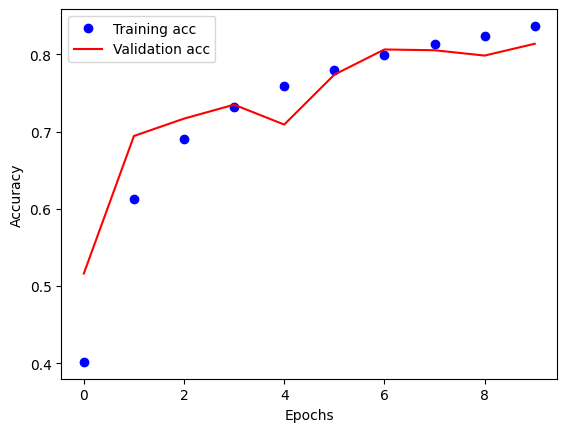

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

#follows a VGG model with dropout layers
models = Sequential()
models.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
models.add(BatchNormalization())
models.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
models.add(BatchNormalization())
models.add(MaxPooling2D((2, 2)))
models.add(Dropout(0.2))

models.add(Conv2D(64, (3, 3), activation='relu', padding='same',input_shape=(64,64, 3)))
models.add(BatchNormalization())
models.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
models.add(BatchNormalization())
models.add(MaxPooling2D((2, 2)))
models.add(Dropout(0.3))

models.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
models.add(BatchNormalization())
models.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
models.add(BatchNormalization())
models.add(MaxPooling2D((2, 2)))
models.add(Dropout(0.4))

models.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
models.add(BatchNormalization())
models.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
models.add(BatchNormalization())
models.add(MaxPooling2D((2, 2)))
models.add(Dropout(0.25))

models.add(Flatten())
models.add(Dense(512, activation='relu'))
models.add(BatchNormalization())
models.add(Dropout(0.5))

models.add(Dense(10, activation='softmax'))

models.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_45 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_46 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [32]:
models.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

history = models.fit(x_train, y_train_vec, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 11ms/step - loss: 1.6691 - acc: 0.4411
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0164 - acc: 0.6495
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8313 - acc: 0.7182
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7241 - acc: 0.7559
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6488 - acc: 0.7806
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6005 - acc: 0.7989
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5569 - acc: 0.8107
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5217 - acc: 0.8235
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4878 - acc: 0.8355
Epoch 10/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4634 - acc: 0.8421


In [33]:
loss_and_acc = models.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 2s 4ms/step - loss: 0.5671 - acc: 0.8112
loss = 0.5670964121818542
accuracy = 0.8112000226974487
